In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm
from scipy import stats
from geopy import distance
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

## Uploading our cleaned data

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,distance_sammamish,distance_kirkland,distance_shoreline,median_zip_income,zip_population,sqft_living_x_above,grade_x_price,sqft_living_grade,sqft_bath,zip_has_wh
0,0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,0,...,12.6,14.9,21.5,83621.0,24668.0,1392400,4745566.0,8260,1180.0,0
1,1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,0,...,16.5,7.4,3.2,77602.0,50153.0,4348900,5355000.0,19390,6925.0,0
2,2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,0,...,11.6,12.2,18.4,87788.0,26282.0,4550400,4375000.0,20160,5760.0,0
3,3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,0,...,12.3,8.7,13.4,94790.0,48937.0,2354400,6732000.0,19440,6480.0,0
4,4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,0,...,5.7,11.8,20.0,128556.0,27808.0,1254400,9030000.0,7840,2240.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28723 entries, 0 to 28722
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28723 non-null  int64  
 1   id                    28723 non-null  int64  
 2   date                  28723 non-null  object 
 3   price                 28723 non-null  float64
 4   bedrooms              28723 non-null  int64  
 5   bathrooms             28723 non-null  float64
 6   sqft_living           28723 non-null  int64  
 7   sqft_lot              28723 non-null  int64  
 8   floors                28723 non-null  float64
 9   waterfront            28723 non-null  int64  
 10  greenbelt             28723 non-null  int64  
 11  nuisance              28723 non-null  int64  
 12  view                  28723 non-null  int64  
 13  condition             28723 non-null  int64  
 14  grade                 28723 non-null  int64  
 15  heat_source        

### Creating Train/Test Splits to test our best model

In [5]:
X = df[['sqft_living', 'grade', 'sqft_living_grade', 'yr_renovated', 'sqft_above', 'sqft_basement', 'condition', 
        'floors', 'waterfront', 'view', 'year', 'median_zip_income', 'distance_shoreline', 
        'sqft_bath', 'sqft_living_x_above', 'zip_population', 'zip_has_wh','distance_seattle','distance_bellvue', 
        'distance_kent', 'distance_federal_way', 'distance_bothell', 'distance_burien', 'distance_auburn',
        'distance_renton', 'distance_redmond', 'distance_sammamish', 'distance_kirkland','distance_shoreline',
        'lat', 'sqft_lot', 'greenbelt']]
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
ss = StandardScaler()

In [8]:
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [9]:
X_standardized_train.mean(axis = 0)

array([ 8.97631826e-17,  1.45246725e-16, -1.73871991e-16, -5.05359650e-17,
       -9.78913448e-17,  3.53398357e-17,  3.70361478e-16, -1.85534137e-16,
        9.18835727e-18,  2.89786652e-17,  1.94877636e-13,  1.28548652e-16,
        1.51961293e-17, -2.12039014e-17, -6.07845173e-17,  1.22010783e-16,
        6.07845173e-17,  2.31475924e-16, -2.63281776e-17,  3.18058521e-17,
       -2.15572998e-17, -2.82718685e-17,  8.09282237e-17, -1.09553491e-16,
       -7.35068582e-17, -2.20962322e-16,  3.43679902e-16,  1.68747715e-16,
        1.51961293e-17, -2.05183086e-14,  3.25126488e-17, -3.60466324e-17])

In [10]:
X_standardized_train.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
X_standardized_test.mean(axis = 0)

array([ 0.00831375, -0.00830339,  0.00826744,  0.00929756,  0.00866133,
        0.00140857, -0.02422433,  0.0057532 ,  0.00070168,  0.00288955,
       -0.00670795, -0.01965323,  0.00897327,  0.00970705,  0.0158032 ,
       -0.01722332, -0.00699347,  0.00374842,  0.01782197, -0.00302264,
       -0.00702189,  0.01824478, -0.00831541, -0.0046212 ,  0.00388591,
        0.02469259,  0.02374795,  0.0202834 ,  0.00897327, -0.01168876,
        0.00014328, -0.0081407 ])

In [12]:
X_standardized_test.std(axis = 0)

array([1.02604391, 1.01830229, 1.03107272, 1.01983853, 1.02534837,
       0.9960621 , 1.00331508, 1.0104559 , 1.00288996, 1.00275902,
       0.9980378 , 0.99003336, 1.0074608 , 1.04669396, 1.10926158,
       0.98627756, 0.99145021, 1.01538899, 1.00828847, 0.997908  ,
       0.99829583, 0.99795012, 1.01714673, 0.99653907, 1.00760042,
       0.99572867, 1.00209711, 0.99945247, 1.0074608 , 0.9992746 ,
       0.82166042, 0.97572678])

In [13]:
lr_raw = LinearRegression()
lr_raw.fit(X_standardized_train, y_train)
lr_raw.score(X_standardized_train, y_train)

0.7517278648478002

In [14]:
pd.Series(lr_raw.coef_, index = X.columns)

sqft_living            -329826.031807
grade                   -73346.950138
sqft_living_grade       694959.590674
yr_renovated             20289.204078
sqft_above              257921.474176
sqft_basement             2848.411428
condition                47344.942159
floors                  -32588.304930
waterfront               34505.787162
view                     57147.199994
year                     77538.641699
median_zip_income        98958.443636
distance_shoreline       68497.750622
sqft_bath                59687.583169
sqft_living_x_above    -256045.823043
zip_population          -27337.505105
zip_has_wh                7202.809498
distance_seattle        171393.802686
distance_bellvue       -573944.849007
distance_kent           -96046.277231
distance_federal_way   -106454.295906
distance_bothell        484955.618718
distance_burien          39671.096861
distance_auburn         115807.516878
distance_renton         258396.565632
distance_redmond        279297.726322
distance_sam

### Interpreting Our Scaled Coefficients

From our scaled coeffients, we see an interesting picture as to the weight of variables in our model that affect the sale price of a home.  The "distance from Bellevue" and "distance from Kirkland" variables have the largest coefficients, indicating that these distance variables have a much greater weight than other coefficients in our model.  Outside of these three coeffients as standouts, other variables in our model fall much lower with the square footage of a basement being the variable with the least weight.

In [15]:
y_pred = lr_raw.predict(X_standardized_test)
mean_absolute_error(y_pred, y_test)

196212.11068962447

## The findings
Our model explains approximately 76% of the variance in home prices (R-Square = .755)

The MAE is 197248, meaning our prediction will come within $197,248 of the actual price

## Checking Normality

In [16]:
lr_raw.fit(X_train, y_train)

LinearRegression()

In [17]:
train_preds = lr_raw.predict(X_train)
test_preds = lr_raw.predict(X_test)

In [18]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

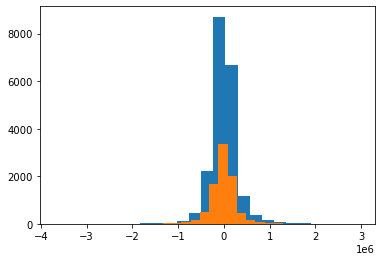

In [19]:
plt.hist(train_residuals, label = 'Train', bins = 25)
plt.hist(test_residuals, label = 'Test', bins = 25)
plt.show()

Everything looks normally distributed.

## Checking Residuals

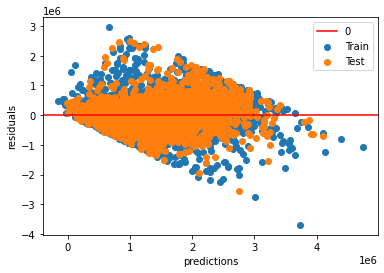

In [20]:
plt.scatter(train_preds, train_residuals, label='Train')
plt.scatter(test_preds, test_residuals, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

The assumption of linearity looks mostly good.